# Multi-class classification of handwritten digits using a deep CNN model

Using the MNIST dataset.

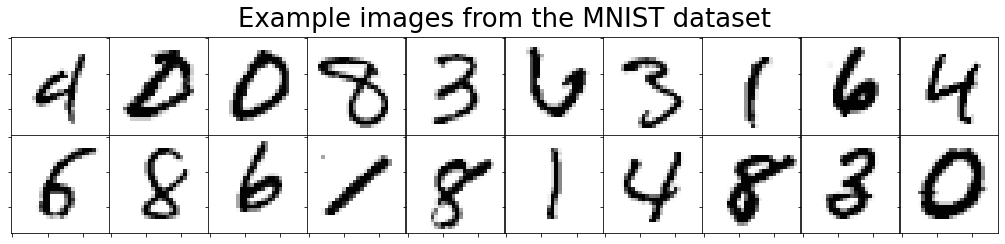

In [1]:
# Import packages
import numpy as np
import random

# Reproducible results
np.random.seed(42)
random.seed(42)

import sklearn.svm

import matplotlib.pyplot as plt

import tensorflow.keras
import tensorflow.keras.datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

K.set_image_data_format("channels_last")

(X, y), (X_val, y_val) = tensorflow.keras.datasets.mnist.load_data()

X_test = X_val[-2000:, :]
y_test = y_val[-2000:]
X_val = X_val[:-2000, :]
y_val = y_val[:-2000]

# Add channel dimensions last
X = X[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X = X.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
X /= 255.0
X_val /= 255.0
X_test /= 255.0

# Plot example images
fig = plt.figure(figsize=(14.0, 3.25))
fig.subplots_adjust(top=0.85,
                    bottom=0.01,
                    left=0.01,
                    right=0.99,
                    wspace=0.0,
                    hspace=0.0)
ax_i = 1
for i in range(2):
    for j in range(10):
        plt.subplot(2, 10, ax_i)
        ax = plt.gca()
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        im = X[np.random.randint(X.shape[0]), :, :, 0]
        ax.imshow(im, cmap=plt.get_cmap("Greys"))
        ax_i += 1
plt.suptitle("Example images from the MNIST dataset", fontsize=26)
plt.show()

In [2]:
num_classes = len(set(y))

y_orig = y.copy()
y_val_orig = y_val.copy()
y = tensorflow.keras.utils.to_categorical(y, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

input_shape = (*X.shape[1:3], 1)

print(f"Training set size X  : {X.shape}")
print(f"Training set size y  : {y.shape}")
print(f"Validation set size X: {X_val.shape}")
print(f"Validation set size y: {y_val.shape}")
print(f"Test set size X      : {X_test.shape}")
print(f"Test set size y      : {y_test.shape}")
print(f"Input shape          : {input_shape}")
print(f"Number of classes    : {num_classes}")

Training set size X  : (60000, 28, 28, 1)
Training set size y  : (60000, 10)
Validation set size X: (8000, 28, 28, 1)
Validation set size y: (8000, 10)
Test set size X      : (2000, 28, 28, 1)
Test set size y      : (2000, 10)
Input shape          : (28, 28, 1)
Number of classes    : 10


In [3]:
# Create baseline model

# Reshape for the SVC model
X_ = X.reshape(X.shape[0], -1)
X_val_ = X_val.reshape(X_val.shape[0], -1)
X_test_ = X_test.reshape(X_test.shape[0], -1)

# Fit baseline model
model_baseline = sklearn.svm.SVC(C=1.0,
                                 kernel="rbf",
                                 gamma="auto",
                                 shrinking=True,
                                 tol=0.001,
                                 cache_size=200,
                                 class_weight=None,
                                 verbose=True,
                                 max_iter=100,  # Note, only five iterations here!
                                 decision_function_shape="ovr")
_ = model_baseline.fit(X_, y_orig)

[LibSVM]

/home/tommy/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [4]:
# Evaluate baseline model
yhat = model_baseline.predict(X_)
yhat_val = model_baseline.predict(X_val_)
acc = sklearn.metrics.accuracy_score(y_orig, yhat)
acc_val = sklearn.metrics.accuracy_score(y_val_orig, yhat_val)
print(f"Training data error  : {acc:.3f}")
print(f"Validation data error: {acc_val:.3f}")

Training data error  : 0.465
Validation data error: 0.448


In [ ]:
# Create deep CNN model

def create_model():

    model = "... add your code here!"

    return model

model = create_model()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Train model
model.fit(X, y,
          batch_size=64,
          epochs=1,  # Note, only one epoch here!
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print("Validation loss    :", score[0])
print("Validation accuracy:", score[1])

In [ ]:
# Evaluate the final model on the test data.
# This is only ever done once, and as the last thing we do.
# Training another model after this, based on the performance on the test data
# leads to biased results.
acc = model.evaluate(X, y, verbose=0)
acc_val = model.evaluate(X_val, y_val, verbose=0)
acc_test = model.evaluate(X_test, y_test, verbose=0)
print(f"Training data error  : {acc[1]:.3f}")
print(f"Validation data error: {acc_val[1]:.3f}")
print(f"Test data error      : {acc_test[1]:.3f}")